In [1]:
# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
# Assuming data_utils.py is in the src directory relative to the notebook's location
# Adjust the path if your notebook is elsewhere
import sys
# Add src directory to path if needed (adjust relative path as necessary)
# Example: If notebook is in root, and src is in root/src
# sys.path.append(os.path.abspath(os.path.join('.', 'src')))
# Example: If notebook is in notebooks/, and src is in ../src
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
try:
    from data_utils import load_sp500_csv, preprocess_prices
except ImportError:
    print("Error importing data_utils. Make sure src directory is in Python path.")
    # Define functions manually if import fails (less ideal)
    def load_sp500_csv(path: str, skiprows: int = 3, date_col: str = "Date", cols: list = None) -> pd.DataFrame:
        if cols is None:
            cols = ["Date", "Close", "High", "Low", "Open", "Volume"]
        df = pd.read_csv(path, skiprows=skiprows, names=cols, parse_dates=[date_col], index_col=date_col)
        return df

    def preprocess_prices(df: pd.DataFrame) -> pd.DataFrame:
        df_clean = df.ffill().bfill()
        for col in ["Close", "High", "Low", "Open", "Volume"]:
            df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")
        df_clean = df_clean.dropna()
        return df_clean

In [2]:
# ## 2. Load and Preprocess Data

# Define the path to your data file
# Adjust this path based on where you run the notebook from
data_path = os.path.abspath(os.path.join('..', 'data', 'sp500_20_years.csv'))
# If running from root: data_path = 'data/sp500_20_years.csv'

print(f"Attempting to load data from: {data_path}")

if not os.path.exists(data_path):
    print(f"ERROR: Data file not found at {data_path}")
    # Handle error appropriately, maybe raise Exception or exit
    raise FileNotFoundError(f"Data file not found at {data_path}")
else:
    # Load data using the utility function
    # Assuming the CSV has 3 header rows to skip
    df_raw = load_sp500_csv(data_path, skiprows=3)

    # Preprocess the data (handle NaNs, ensure numeric)
    df_clean = preprocess_prices(df_raw)

    # Sort by date just in case
    df_clean = df_clean.sort_index()

    print("Data loaded and preprocessed successfully.")
    print(f"Data shape: {df_clean.shape}")
    print(f"Date range: {df_clean.index.min()} to {df_clean.index.max()}")
    print("\nSample data:")
    print(df_clean.head())

Attempting to load data from: /Users/rishiguptha/Documents/SBU/Spring'25/AMS 585 Intern/sp500-forecast/data/sp500_20_years.csv
Data loaded and preprocessed successfully.
Data shape: (5029, 5)
Date range: 2005-04-15 00:00:00 to 2025-04-09 00:00:00

Sample data:
                  Close         High          Low         Open      Volume
Date                                                                      
2005-04-15  1142.619995  1162.050049  1141.920044  1162.050049  2689960000
2005-04-18  1145.979980  1148.920044  1139.800049  1142.619995  2180670000
2005-04-19  1152.780029  1154.670044  1145.979980  1145.979980  2142700000
2005-04-20  1137.500000  1155.500000  1136.150024  1152.780029  2217050000
2005-04-21  1159.949951  1159.949951  1137.500000  1137.500000  2308560000


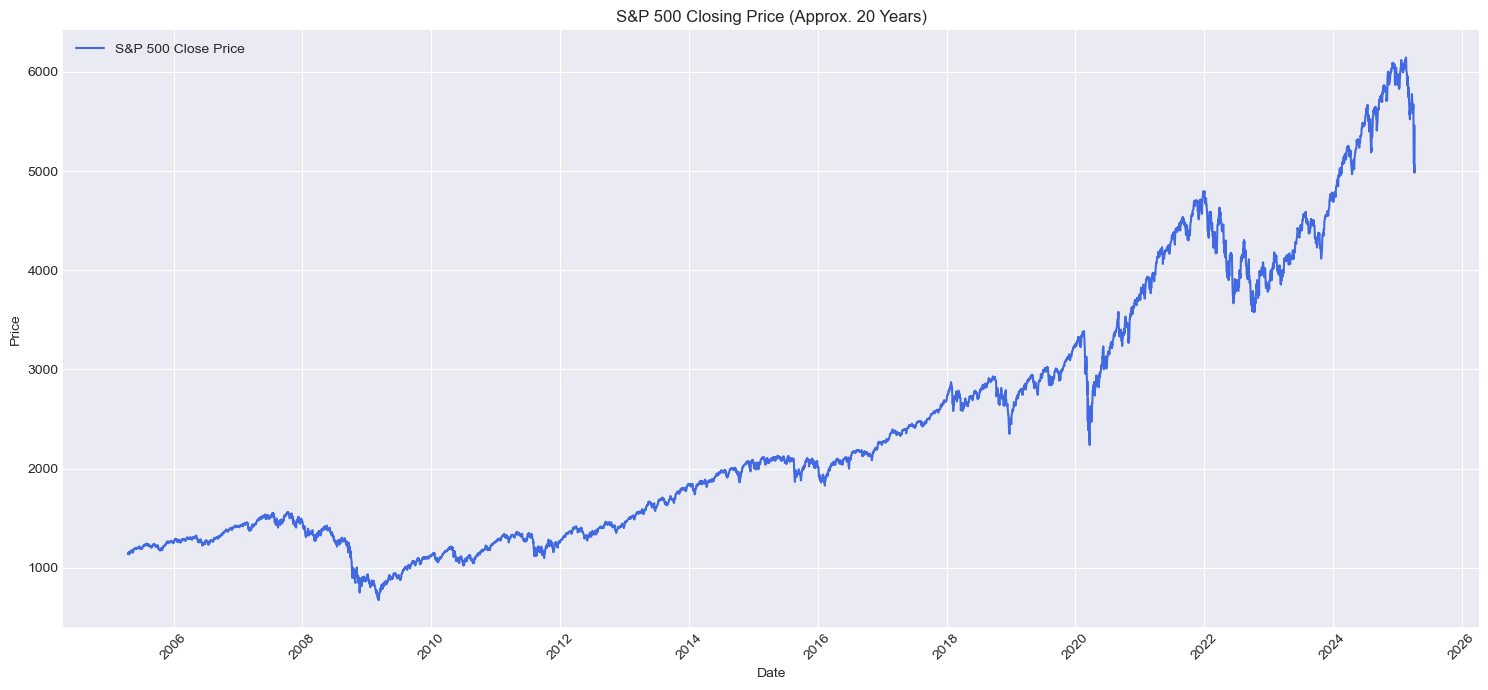

In [3]:
# ## 3. Plotting Price Trends

# Ensure data was loaded before plotting
if 'df_clean' in locals():
    # --- Plot 1: Full 20 Years ---
    plt.style.use('seaborn-v0_8-darkgrid') # Use a nice style
    fig1, ax1 = plt.subplots(figsize=(15, 7))

    ax1.plot(df_clean.index, df_clean['Close'], label='S&P 500 Close Price', color='royalblue')
    ax1.set_title('S&P 500 Closing Price (Approx. 20 Years)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.xaxis.set_major_locator(mdates.YearLocator(2)) # Major ticks every 2 years
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_minor_locator(mdates.YearLocator(1)) # Minor ticks every year
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


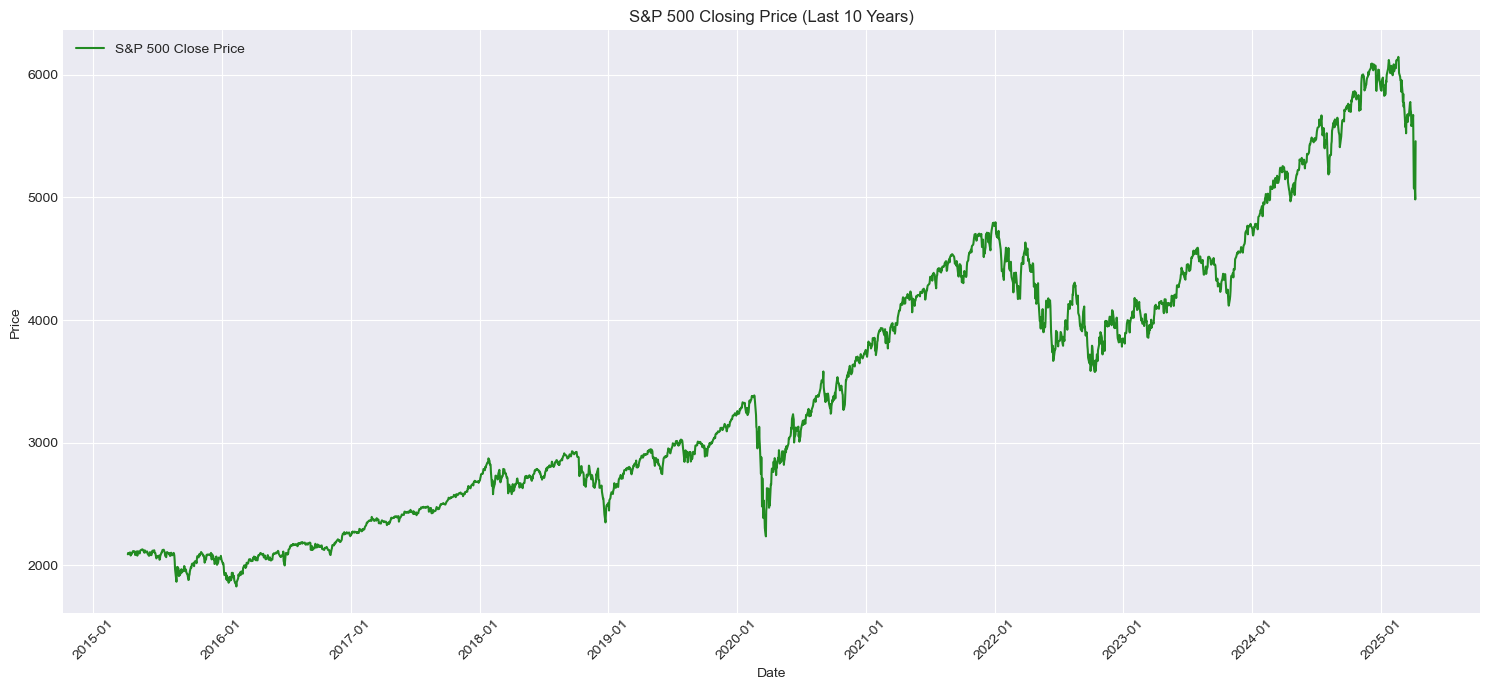

In [5]:
# --- Plot 2: Last 10 Years ---
# Calculate start date for the last 10 years
end_date = df_clean.index.max()
start_date_10y = end_date - pd.DateOffset(years=10)
df_10y = df_clean[df_clean.index >= start_date_10y]

fig2, ax2 = plt.subplots(figsize=(15, 7))
ax2.plot(df_10y.index, df_10y['Close'], label='S&P 500 Close Price', color='forestgreen')
ax2.set_title('S&P 500 Closing Price (Last 10 Years)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend()
ax2.xaxis.set_major_locator(mdates.YearLocator(1)) # Major ticks every year
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_minor_locator(mdates.MonthLocator(interval=6)) # Minor ticks every 6 months
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

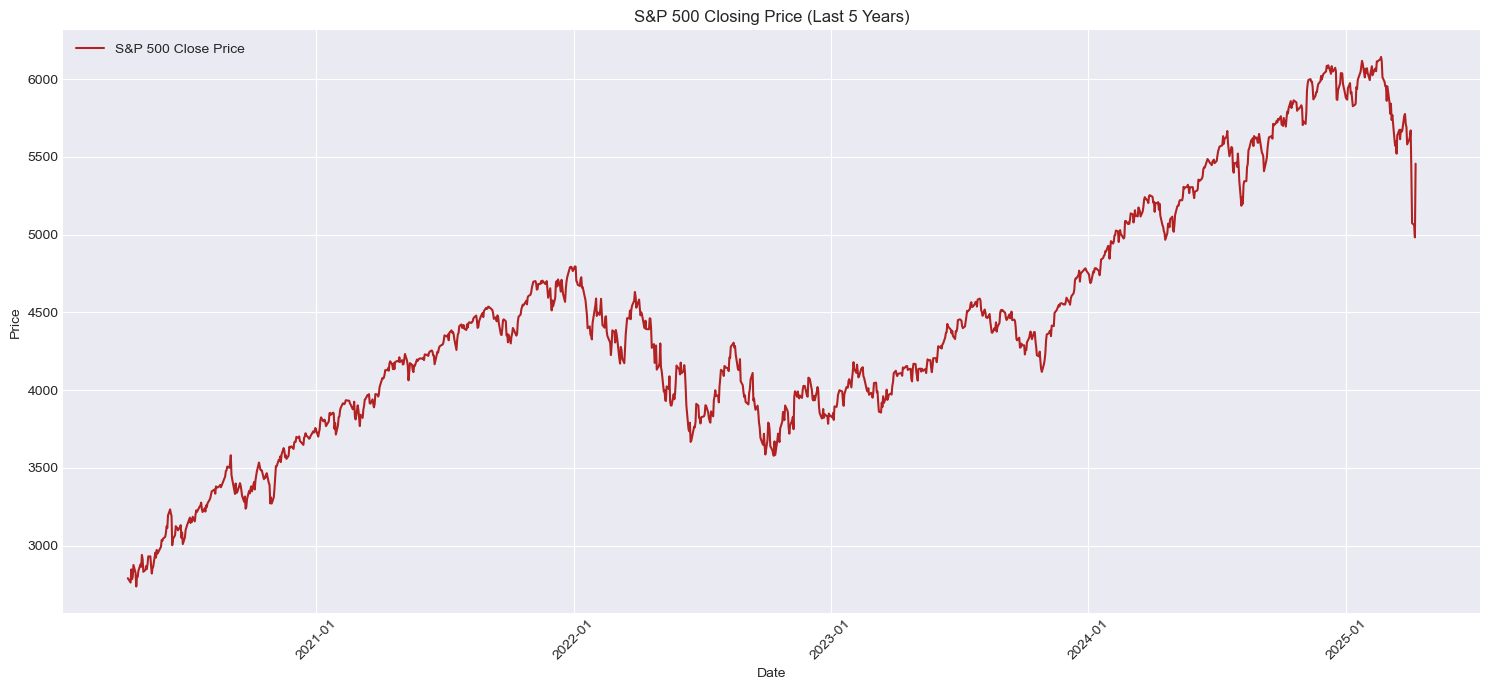

In [6]:
# --- Plot 3: Last 5 Years ---
# Calculate start date for the last 5 years
start_date_5y = end_date - pd.DateOffset(years=5)
df_5y = df_clean[df_clean.index >= start_date_5y]

fig3, ax3 = plt.subplots(figsize=(15, 7))
ax3.plot(df_5y.index, df_5y['Close'], label='S&P 500 Close Price', color='firebrick')
ax3.set_title('S&P 500 Closing Price (Last 5 Years)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')
ax3.legend()
ax3.xaxis.set_major_locator(mdates.YearLocator(1))  # Major ticks every year
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))  # Minor ticks every 3 months
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()